# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)




<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer 1**: 

- Q1. How many people travel from place A to place B by walking where bicycle-sharing system isn't installed? 
- Q2. How many people from them are willing to use our service? 
- Q3. How many of our users use subscription service? And how many dont? 
- Q4. How many of our users want to Subscribe to our service but is a little bit expensive to them?

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data.

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

**Answer**

In [1]:
#importing necessory modules for analyzing data
import pandas as pd
import numpy as np

#importing graphing modules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#assigning city data files to a pandas dataframe variable
NYC_data = pd.read_csv('data/NYC-CitiBike-2016.csv')
Chicago_data = pd.read_csv('data/Chicago-Divvy-2016.csv')
Washington_DC_data = pd.read_csv('data/Washington-CapitalBikeshare-2016.csv')

In [3]:
#printing out the first entry of New York city
NYC_data.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,839,1/1/2016 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0


In [4]:
#printing out the first entry of Chicago city
Chicago_data.head(1)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0


In [5]:
#printing out the first entry of Washington DC city
Washington_DC_data.head(1)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,427387,3/31/2016 22:57,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered


The powerful and flexible pandas module makes acccessing data a lot easier by giving just few words of code. 

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Address each of the cleaning tasks described above.

**Answer:**

In [6]:
"""Converting duration columns to minutes of each files"""

#since New York & Chicago duration have been given in second, we divide by 60 converting in min
NYC_data['tripduration'] = NYC_data['tripduration']/60
Chicago_data['tripduration'] = Chicago_data['tripduration']/60

#since Washington has in miliseconds...
Washington_DC_data['Duration (ms)'] = Washington_DC_data['Duration (ms)']/60000

In [7]:
"""Converting Start time of the trip of each file to datetime format"""

#converting each file to datetime
NYC_data['starttime'] = pd.to_datetime(NYC_data['starttime'])
Chicago_data['starttime'] = pd.to_datetime(Chicago_data['starttime'])
Washington_DC_data['Start date'] = pd.to_datetime(Washington_DC_data['Start date'])

In [8]:
"""Changing User type of Washington DC city to match other city values for convenience"""

#chaning member type colum values
Washington_DC_data['Member Type'].replace(to_replace = 'Registered', value = 'Subscriber', inplace = True)
Washington_DC_data['Member Type'].replace(to_replace = 'Casual', value = 'Customer', inplace = True)

In [9]:
NYC_data.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,13.983333,2016-01-01 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0


In [10]:
Chicago_data.head(1)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,2016-03-31 23:30:00,3/31/2016 23:46,2295,15.433333,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0


In [11]:
Washington_DC_data.head(1)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,7.123117,2016-03-31 22:57:00,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Subscriber


**Question 3b**: Now, create a condensed data file for each city consisting only of the data fields indicated above.

**Answer :**

In [12]:
"New York"
#first lets split datetime values into different columns

#will display month
NYC_data['month'] = NYC_data['starttime'].dt.month
#will display hour
NYC_data['hour'] = NYC_data['starttime'].dt.hour
#will display name of the day
NYC_data['day_of_week'] = NYC_data['starttime'].dt.weekday_name

#now lets drop unneccesory columns
NYC_data.drop(['starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 
               'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 
               'birth year', 'gender'], axis = 1, inplace = True)

#dsiplaying first two rows
NYC_data.head(2)

,tripduration,usertype,month,hour,day_of_week
0,13.983333,Customer,1,0,Friday
1,11.433333,Subscriber,1,0,Friday


In [13]:
"Chicago"
#first lets split datetime values into different columns

#will display month
Chicago_data['month'] = Chicago_data['starttime'].dt.month
#will display hour
Chicago_data['hour'] = Chicago_data['starttime'].dt.hour
#will display name of the day
Chicago_data['day_of_week'] = Chicago_data['starttime'].dt.weekday_name

#now lets drop unneccesory columns
Chicago_data.drop(['trip_id', 'starttime', 'stoptime','from_station_id', 'from_station_name', 'to_station_id', 'to_station_name',
                   'bikeid', 'birthyear', 'gender'], axis = 1, inplace = True)

#dsiplaying first two rows
Chicago_data.head(2)

,tripduration,usertype,month,hour,day_of_week
0,15.433333,Subscriber,3,23,Thursday
1,3.300000,Subscriber,3,22,Thursday


In [14]:
"Washington DC"
#first lets split datetime values into different columns

#will display month
Washington_DC_data['month'] = Washington_DC_data['Start date'].dt.month
#will display hour
Washington_DC_data['hour'] = Washington_DC_data['Start date'].dt.hour
#will display name of the day
Washington_DC_data['day_of_week'] = Washington_DC_data['Start date'].dt.weekday_name


#now lets drop unneccesory columns
Washington_DC_data.drop(['Start date', 'End date','Start station number', 'Start station', 'End station number', 
                         'End station', 'Bike number'], axis = 1, inplace = True)

#dsiplaying first two rows
Washington_DC_data.head(2)

,Duration (ms),Member Type,month,hour,day_of_week
0,7.123117,Subscriber,3,22,Thursday
1,9.792517,Subscriber,3,22,Thursday


Before converting the above dataframes to csv, let's change the column names of Washington city where it has two columns that don't match with other 2 cities. Having same column names across three cities in a csv file makes our code and life easier a bit!!

In [15]:
Washington_DC_data.rename(columns = {'Duration (ms)' : 'tripduration', 'Member Type': 'usertype'}, inplace = True)
Washington_DC_data.head(1)

,tripduration,usertype,month,hour,day_of_week
0,7.123117,Subscriber,3,22,Thursday


In [16]:
"""Now Converting these dataframes to csv file"""

#the csv format will be placed in 'output' folder

#NYC
NYC_data.to_csv(r'output\NYC.csv', encoding = 'utf-8', index = False, columns = ['tripduration', 'month', 'day_of_week', 'hour',
                                                                                 'usertype'])
#Chicago
Chicago_data.to_csv(r'output\Chicago.csv', encoding = 'utf-8', index = False, columns = ['tripduration', 'month', 'day_of_week',
                                                                                         'hour', 'usertype'])
#Washington
Washington_DC_data.to_csv(r'output\Washington_DC.csv', encoding = 'utf-8', index = False, columns = ['tripduration', 'month', 
                                                                                                     'day_of_week', 'hour', 
                                                                                                     'usertype'])

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 

In [17]:
#reading new data files from output folder
NYC_data = pd.read_csv('output/NYC.csv')
Chicago_data = pd.read_csv('output/Chicago.csv')
Washington_DC_data = pd.read_csv('output/Washington_DC.csv')

In [18]:
#giving list of variables which hold datafiles 
cities_data = [NYC_data, Chicago_data, Washington_DC_data]

#giving a list city names
city_names = ['NYC', 'Chicago', 'Washington']

In [19]:
#giving a function to calculate statistics
def total_count(city):
    
    #this gives us total no. of subscribers and customers from 'usertype' column since each file has same column name
    subs, cust = city['usertype'].value_counts()
    #giving total number of datatrips of the city
    total = subs + cust
    
    return (subs, cust, total)

In [20]:
#for printing city name
i = 0

#looping through list of datafiles and calling the function to print each cities statistics
for city in cities_data:
    
    #will store the return values in these var
    subs, cust, total = total_count(city)
    #displaying statistics of each city
    print('In ' + city_names[i] +' city, the total no. of Subscribers are ' + str(subs) + ', Customers are ' + str(cust) + ' and total no. of rides is ' + str(total) + '\n')
    
    #will display next city name
    i+=1

In NYC city, the total no. of Subscribers are 245896, Customers are 30185 and total no. of rides is 276081

In Chicago city, the total no. of Subscribers are 54982, Customers are 17149 and total no. of rides is 72131

In Washington city, the total no. of Subscribers are 51753, Customers are 14573 and total no. of rides is 66326



From the above data computed, now we can answer for the above questions:

- New York has the highest number of trips of 276798. 
- New York has the highest proportion of trips made by subscribers.(0.888) 
- Chicago has the highest proportion of trips made by short-term customers.(0.237)




**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

In [21]:
#function to calculate avg
def average_trip_length(city):
    #taking avg of trip duration
    avg = city['tripduration'].mean()
    return avg

In [22]:
#for printing city name
i = 0

#looping through list of datafiles and calling the function to print each cities statistics
for city in cities_data:
    
    #will store the return values of the func to a var
    avg = average_trip_length(city)
    #displaying statistics of each city
    print('For ' + city_names[i] +' city, the average tip length is ' + str(avg) + '\n')
    
    #will display next city name
    i+=1

For NYC city, the average tip length is 15.812592998

For Chicago city, the average tip length is 16.5636293688

For Washington city, the average tip length is 18.9328735591



In [23]:
def lenght_more_30min(city):
    #gives total no.of trip rides of the city
    total_trip_rides = city.shape[0]
    
    #gives boolean values if greater
    no_trips = city['tripduration'] >= 30.0
    
    #return no. of True boolean values and total rides
    return no_trips.sum() , total_trip_rides

In [24]:
#for printing city name
i = 0

#looping through list of datafiles and calling the function to print each cities statistics
for city in cities_data:
    
    #saves the value returned by a function to respective var
    yes, total = lenght_more_30min(city)
    #calculates proportion
    prop = (yes/total)*100
    
    #displays output
    print('Proportion of trips longer than 30 min in ' + city_names[i] + ': ' + str(prop) + '\n')
    
    i+=1

Proportion of trips longer than 30 min in NYC: 7.3168881278

Proportion of trips longer than 30 min in Chicago: 8.34731252859

Proportion of trips longer than 30 min in Washington: 10.8388867111



**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**:

In [25]:
#function for calculating mean duration of subscribers and customers and who travels most for each city
def avg_length_sub_cust(city):
    
    #this will calculate the mean of trip duration for subscribers and customers
    sub_length_mean = city.loc[city['usertype'] == 'Subscriber', 'tripduration'].mean()
    cust_length_mean = city.loc[city['usertype'] == 'Customer', 'tripduration'].mean()
    
    #who rides the most? subscribers or customers
    if sub_length_mean > cust_length_mean:
        best = 'Subscribers'
    else:
        best = 'Customers'
        
    return sub_length_mean, cust_length_mean, best

In [26]:
#for printing city name
i = 0

#looping through list of datafiles and calling the function to print each cities statistics
for city in cities_data:
    
    #saves the value returned by a function to respective var
    sub_length_mean, cust_length_mean, best = avg_length_sub_cust(city)
    
    #displays output
    print('The avarage trip of Subscribers:' + str(sub_length_mean) + ', The average trip of customers: ' + str(cust_length_mean) + '\n')
    print('Type of users took longer rides: ' +  best + '\n\n')
    i+=1

The avarage trip of Subscribers:13.6807905239, The average trip of customers: 32.9820043068

Type of users took longer rides: Customers


The avarage trip of Subscribers:12.0672016903, The average trip of customers: 30.979781134

Type of users took longer rides: Customers


The avarage trip of Subscribers:12.5281204993, The average trip of customers: 41.6780313925

Type of users took longer rides: Customers




<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`.

Create a histogram of the trip times for these cities. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [27]:
def plot_trip_duration(city):
    plot = plt.hist(city["tripduration"])
    plt.xlabel('Trip Duration')
    plt.ylabel('No. of users')
    plt.title(city_names[i])
    plt.show()

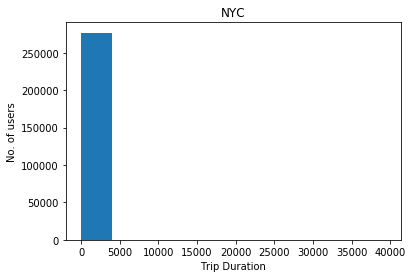

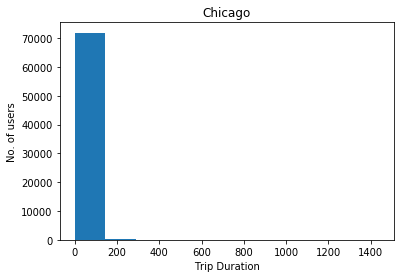

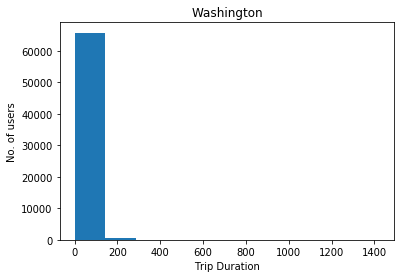

In [28]:
i=0
for city in cities_data:
    plot_trip_duration(city)
    i+=1

You're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data.

**Question 5**: Plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**:


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**:

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 